<a href="https://colab.research.google.com/github/Arunimad/CCIR_NLP/blob/main/TA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lemmatization**

In contrast to stemming, lemmatization is a lot more powerful. It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words, aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

   meeting    --->   meet                (core-word extraction)

   was        --->    be                 (tense conversion to present tense)

   mice       --->   mouse               (plural to singular)


Various Approaches to Lemmatization: 

(Source. geeks for geeks)

1. Wordnet Lemmatizer  

Wordnet is a publicly available lexical database of over 200 languages that provides semantic relationships between its words. It is one of the earliest and most commonly used lemmatizer technique.  

* It is present in the nltk library in python.
* Wordnet links words into semantic relations. ( eg. synonyms )
*It groups synonyms in the form of synsets.

synsets : a group of data elements that are semantically equivalent. 

In [ ]:
pip list

In [2]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
 
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

 
# single word lemmatization examples
list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling',
         'driving', 'died', 'tried', 'feet']
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words))

[nltk_data] Downloading package wordnet to /root/nltk_data...


kites ---> kite
babies ---> baby
dogs ---> dog
flying ---> flying
smiling ---> smiling
driving ---> driving
died ---> died
tried ---> tried
feet ---> foot


In [3]:
nltk.download('punkt')
# sentence lemmatization examples
string = 'the cat is sitting with the bats on the striped mat under many flying geese'
 
# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)

 
lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
 
print(lemmatized_string)  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['the', 'cat', 'is', 'sitting', 'with', 'the', 'bats', 'on', 'the', 'striped', 'mat', 'under', 'many', 'flying', 'geese']
the cat is sitting with the bat on the striped mat under many flying goose


2. Wordnet Lemmatizer (with POS tag) 

In the above approach, we observed that Wordnet results were not up to the mark. Words like ‘sitting’, ‘flying’ etc remained the same after lemmatization. This is because these words are treated as a noun in the given sentence rather than a verb. To overcome come this, we use POS (Part of Speech) tags. 
We add a tag with a particular word defining its type (verb, noun, adjective etc). 

For Example, 

* Word      +    Type (POS tag)     —>     Lemmatized Word
* driving    +    verb      ‘v’            —>     drive
* dogs       +    noun      ‘n’           —>     dog

In [4]:
# WORDNET LEMMATIZER (with appropriate pos tags)
 
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
 
lemmatizer = WordNetLemmatizer()
 
# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None
 
sentence = 'the cat is sitting with the bats on the striped mat under many badly flying geese'
 
# tokenize the sentence and find the POS tag for each token
pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
 
print(pos_tagged)

 
# As you may have noticed, the above pos tags are a little confusing.
 
# we use our own pos_tagger function to make things simpler to understand.
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
print(wordnet_tagged)

 
lemmatized_sentence = []
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_sentence.append(word)
    else:       
        # else use the tag to lemmatize the token
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
lemmatized_sentence = " ".join(lemmatized_sentence)
 
print(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('the', 'DT'), ('cat', 'NN'), ('is', 'VBZ'), ('sitting', 'VBG'), ('with', 'IN'), ('the', 'DT'), ('bats', 'NNS'), ('on', 'IN'), ('the', 'DT'), ('striped', 'JJ'), ('mat', 'NN'), ('under', 'IN'), ('many', 'JJ'), ('badly', 'RB'), ('flying', 'VBG'), ('geese', 'JJ')]
[('the', None), ('cat', 'n'), ('is', 'v'), ('sitting', 'v'), ('with', None), ('the', None), ('bats', 'n'), ('on', None), ('the', None), ('striped', 'a'), ('mat', 'n'), ('under', None), ('many', 'a'), ('badly', 'r'), ('flying', 'v'), ('geese', 'a')]
the cat be sit with the bat on the striped mat under many badly fly geese


3. TextBlob 

TextBlob is a python library used for processing textual data. It provides a simple API to access its methods and perform basic NLP tasks.

In [ ]:
pip install textblob

In [6]:
from textblob import TextBlob, Word
 
my_word = 'cats'
 
# create a Word object
w = Word(my_word)
 
print(w.lemmatize())
 
sentence = 'the bats saw the cats with stripes hanging upside down by their feet.'
 
s = TextBlob(sentence)
lemmatized_sentence = " ".join([w.lemmatize() for w in s.words])
 
print(lemmatized_sentence)

cat
the bat saw the cat with stripe hanging upside down by their foot


4. TextBlob (with POS tag) 

Same as in Wordnet approach without using appropriate POS tags, we observe the same limitations in this approach as well. So, we use one of the more powerful aspects of the TextBlob module the ‘Part of Speech’ tagging to overcome this problem.

In [7]:
from textblob import TextBlob
 
# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION : TYPE 2
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list
 
# Lemmatize
sentence = "the bats saw the cats with stripes hanging upside down by their feet"
lemma_list = pos_tagger(sentence)
lemmatized_sentence = " ".join(lemma_list)
print(lemmatized_sentence)



the bat saw the cat with stripe hang upside down by their foot


5. spaCy 

spaCy is an open-source python library that parses and “understands” large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.). 

In [8]:
pip install spacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import spacy
nlp = spacy.load('en_core_web_sm')
 
# Create a Doc object
doc = nlp('the bats saw the cats with best stripes hanging upside down by their feet')
 
# Create list of tokens from given string
tokens = []
for token in doc:
    tokens.append(token)
 
print(tokens)

 
lemmatized_sentence = " ".join([token.lemma_ for token in doc])
 
print(lemmatized_sentence)

[the, bats, saw, the, cats, with, best, stripes, hanging, upside, down, by, their, feet]
the bat see the cat with good stripe hang upside down by their foot


In the above code, we observed that this approach was more powerful than our previous approaches as :  

* Even Pro-nouns were detected. ( identified by -PRON-)
* Even best was changed to good. 

6. TreeTagger 

The TreeTagger is a tool for annotating text with part-of-speech and lemma information. The TreeTagger has been successfully used to tag over 25 languages and is adaptable to other languages if a manually tagged training corpus is available. 


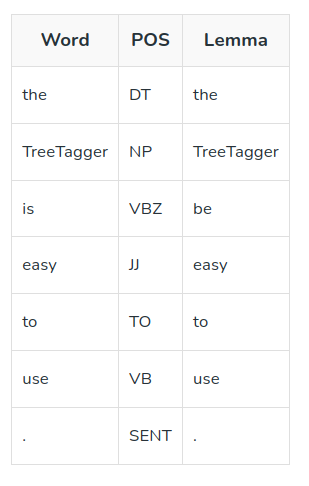

In [11]:
pip install treetaggerwrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40759 sha256=ad84fc6df45bf9c215abfc7845dbccffd08b4e498a5269e903382888feb5906c
  Stored in directory: /root/.cache/pip/wheels/ea/d5/4b/a29ceaa48c687208c69a791394c02c8e432971a98d8e5fc9ca
Successfully built treetaggerwrapper


In [ ]:
pip list -v 

In [12]:

import pandas as pd
import treetaggerwrapper 
 
#t_tagger = tt.TreeTagger(TAGLANG ='en', TAGDIR ='/usr/local/lib/python3.10/dist-packages/treetaggerwrapper/TreeTagger')

 
pos_tags = t_tagger.tag_text("the bats saw the cats with best stripes hanging upside down by their feet")
 
original = []
lemmas = []
tags = []
for t in pos_tags:
    original.append(t.split('\t')[0])
    tags.append(t.split('\t')[1])
    lemmas.append(t.split('\t')[-1])
 
Results = pd.DataFrame({'Original': original, 'Lemma': lemmas, 'Tags': tags})
print(Results)

/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


NameError: ignored

7. Pattern 

Pattern is a Python package commonly used for web mining, natural language processing, machine learning, and network analysis. It has many useful NLP capabilities. It also contains a special feature which we will be discussing below. 

In [16]:
pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pattern-3.6-py3-none-any.whl
  Using cached backports.csv-1.0.7-py2.py3-none-any.whl (12 kB)
  Using cached mysqlclient-2.1.1-cp310-cp310-linux_x86_64.whl
  Using cached feedparser-6.0.10-py3-none-any.whl (81 kB)
  Using cached pdfminer.six-20221105-py3-none-any.whl (5.6 MB)
  Using cached python_docx-0.8.11-py3-none-any.whl
  Using cached CherryPy-18.8.0-py2.py3-none-any.whl (348 kB)
  Using cached cheroot-10.0.0-py3-none-any.whl (101 kB)
  Using cached portend-3.1.0-py3-none-any.whl (5.3 kB)
  Using cached zc.lockfile-3.0.post1-py3-none-any.whl (9.8 kB)
  Using cached jaraco.collections-4.1.0-py3-none-any.whl (11 kB)
  Using cached sgmllib3k-1.0.0.tar.gz (5.8 kB)
  Preparing metadata (setup.py) ... done
  Using cached jaraco.functools-3.6.0-py3-none-any.whl (7.9 kB)
  Using cached tempora-5.2.2-py3-none-any.whl (13 kB)
  Using cached jaraco.text-3.11.1-py3-none-any.whl (1

In [18]:
# PATTERN LEMMATIZER
import pattern
from pattern.en import lemma, lexeme
from pattern.en import parse
 
sentence = "the bats saw the cats with best stripes hanging upside down by their feet"
 
lemmatized_sentence = " ".join([lemma(word) for word in sentence.split()])
 
print(lemmatized_sentence)
#> the bat see the cat with best stripe hang upside down by their feet
 
# Special Feature : to get all possible lemmas for each word in the sentence
all_lemmas_for_each_word = [lexeme(wd) for wd in sentence.split()]
print(all_lemmas_for_each_word)

the bat see the cat with best stripe hang upside down by their feet
[['the', 'thes', 'thing', 'thed'], ['bat', 'bats', 'batting', 'batted'], ['see', 'sees', 'seeing', 'saw', 'seen'], ['the', 'thes', 'thing', 'thed'], ['cat', 'cats', 'catting', 'catted'], ['with', 'withs', 'withing', 'withed'], ['best', 'bests', 'besting', 'bested'], ['stripe', 'stripes', 'striping', 'striped'], ['hang', 'hangs', 'hanging', 'hung'], ['upside', 'upsides', 'upsiding', 'upsided'], ['down', 'downs', 'downing', 'downed'], ['by', 'bies', 'bying', 'bied'], ['their', 'theirs', 'theiring', 'theired'], ['feet', 'feets', 'feeting', 'feeted']]


8. Gensim 

Gensim is designed to handle large text collections using data streaming. Its lemmatization facilities are based on the pattern package we installed above.  

* gensim.utils.lemmatize() function can be used for performing Lemmatization. This method comes under the utils module in python.
* We can use this lemmatizer from pattern to extract UTF8-encoded tokens in their base form=lemma.
* Only considers nouns, verbs, adjectives, and adverbs by default (all other lemmas are discarded).
* For example

Word          --->  Lemmatized Word 

are/is/being  --->  be

saw           --->  see

In [ ]:
pip install gensim

In [ ]:
from gensim.utils import lemmatize
 
sentence = "the bats saw the cats with best stripes hanging upside down by their feet"
 
lemmatized_sentence = [word.decode('utf-8').split('.')[0] for word in lemmatize(sentence)]
 
print(lemmatized_sentence)

In [ ]:
pip install gensim==3.8.0

In [ ]:
from gensim.utils import lemmatize
 
sentence = "the bats saw the cats with best stripes hanging upside down by their feet"
 
lemmatized_sentence = [word.decode('utf-8').split('.')[0] for word in lemmatize(sentence)]
 
print(lemmatized_sentence)

9. Stanford CoreNLP 

CoreNLP enables users to derive linguistic annotations for text, including token and sentence boundaries, parts of speech, named entities, numeric and time values, dependency and constituency parses, sentiment, quote attributions, and relations.   

* CoreNLP is your one stop shop for natural language processing in Java!
* CoreNLP currently supports 6 languages, including Arabic, Chinese, English, French, German, and Spanish.


In [ ]:
pip install stanfordnlp

In [ ]:
import stanfordnlp
stanfordnlp.download("es")
nlp = stanfordnlp.Pipeline(processors='tokenize,mwt,pos,lemma') 

 
# Define properties needed to get lemma
props = {'annotators': 'pos, lemma', 'pipelineLanguage': 'en', 'outputFormat': 'json'}
 
 
sentence = "the bats saw the cats with best stripes hanging upside down by their feet"
parsed_str = nlp.annotate(sentence, properties = props)
print(parsed_str)